In [2]:
# Ajay Choudhury(18018) - DS-ML (Assignment 1)
# import required libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from matplotlib.ticker import MaxNLocator
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [3]:
# import training data and test data
df = pd.read_csv("training_data.csv", header=None) # no headers in dataset
df.head

<bound method NDFrame.head of              0         1
0    -0.235312  1.057181
1     0.812545 -0.551579
2     1.435676 -0.448038
3     1.612300 -0.311149
4     0.336496  0.087980
...        ...       ...
4495 -0.578848  0.689333
4496 -0.084657  1.019098
4497  1.897556 -0.094781
4498  1.373081 -0.399360
4499 -0.648431  0.273141

[4500 rows x 2 columns]>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4500 non-null   float64
 1   1       4500 non-null   float64
dtypes: float64(2)
memory usage: 70.4 KB


In [5]:
# check for null values - no null values
df.isnull().sum()

0    0
1    0
dtype: int64

In [6]:
# import training labels
labels = pd.read_csv("training_data_class_labels.csv", header=None)

# get counts of 0 and 1 in the training labels
# dataset is balanced and equal number of both classes are there
labels.value_counts()

0    2250
1    2250
dtype: int64

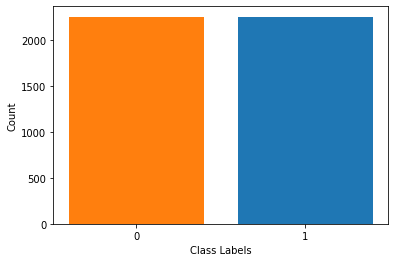

In [7]:
df1 = df.copy()
df1["class"] = labels
class_values = df1["class"].unique()
class_count = df1['class'].value_counts()


ax = plt.axes()

plt.bar(class_values, class_count, color=['tab:orange', 'tab:blue'])
plt.xlabel("Class Labels")
plt.ylabel("Count")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()

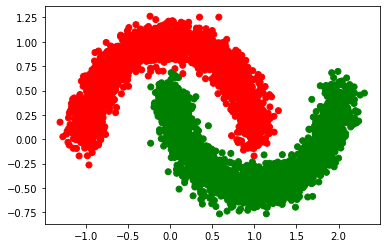

In [8]:
# Plot
fig, ax = plt.subplots()
colors = {0:'red', 1:'green'}
ax.scatter(df1[0], df1[1], c=df1["class"].map(colors))
plt.show()

In [9]:
# split data into training and testing data within the training dataset in 90% and 10% respectively
X_train, X_test, Y_train, Y_test = train_test_split(df, labels, test_size=0.1, random_state=2)
print(df.shape, X_train.shape, X_test.shape)

(4500, 2) (4050, 2) (450, 2)


In [10]:
# 3 models are taken KNN classifier, Naive Bayes and Logistic Regression
model1 = KNeighborsClassifier(n_neighbors=3)
model2 = GaussianNB()
model3 = LogisticRegression()
# parameter tuning for logistic regression
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model3, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, Y_train)

model1.fit(X_train, Y_train)
model2.fit(X_train, Y_train)

C:\Users\ajayc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ajayc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ajayc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [11]:
X_train_pred1 = model1.predict(X_train)
X_train_pred2 = model2.predict(X_train)
X_train_pred3 = grid_search.predict(X_train)

In [12]:
X_test_pred1 = model1.predict(X_test)
X_test_pred2 = model2.predict(X_test)
X_test_pred3 = grid_search.predict(X_test)

In [13]:
X_test_pred1 = X_test_pred1.tolist()
X_test_pred2 = X_test_pred2.tolist()
X_test_pred3 = X_test_pred3.tolist()
Y_test1 = Y_test.values.tolist()

In [14]:
# KNN
print(classification_report(Y_test, X_test_pred1))
acc1 = accuracy_score(Y_test, X_test_pred1)
# Gaussian NB
print(classification_report(X_test_pred2, Y_test))
acc2 = accuracy_score(Y_test, X_test_pred2)
# Logistic regression
print(classification_report(X_test_pred3, Y_test))
acc3 = accuracy_score(Y_test, X_test_pred3)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       210
           1       1.00      1.00      1.00       240

    accuracy                           1.00       450
   macro avg       1.00      1.00      1.00       450
weighted avg       1.00      1.00      1.00       450

              precision    recall  f1-score   support

           0       0.88      0.89      0.88       207
           1       0.90      0.89      0.90       243

    accuracy                           0.89       450
   macro avg       0.89      0.89      0.89       450
weighted avg       0.89      0.89      0.89       450

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       208
           1       0.91      0.90      0.90       242

    accuracy                           0.90       450
   macro avg       0.90      0.90      0.90       450
weighted avg       0.90      0.90      0.90       450



In [15]:
best_score = None
best_model = None
if acc1>acc2:
    if acc1>acc3:
        best_score = acc1
        best_model = "KNN"
    else:
        best_score = acc3
        best_model = "Logistic Regression"
else:
    if acc2>acc3:
        best_score = acc2
        best_model = "Naive Bayes"
    else:
        best_score = acc3
        best_model = "Logistic Regression"


In [16]:
# KNN has the best score amongst all other models
print(best_score)
print(best_model)

1.0
KNN


In [17]:
# Test dataset
test_data = pd.read_csv("test_data.csv", header=None)
test_data

,0,1
0,0.245646,-0.267591
1,2.042604,0.380046
2,0.606186,0.645305
3,0.282751,0.957673
4,-0.429242,0.961515
...,...,...
495,1.149873,-0.436497
496,1.539536,-0.163840
497,1.064805,0.367134
498,0.479972,0.825712


In [18]:
# selected model - KNN
test_pred = model1.predict(test_data)

In [19]:
df = pd.DataFrame(test_pred, columns = ['Class'])
# output a text file 
file = open("ajay_choudhury_labels.txt", "w")
np.savetxt(file, test_pred, fmt='%d')
file.close()